<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 2 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2024-2</h2>
</center>

# Consultas

* Enviar a: **tareas.inf285@gmail.com**
* Se recibirán consultas en **tres** bloques:
1. El primer bloque será desde las 12:15 hrs. hasta las 17:00 hrs. del día jueves, donde todas las preguntas recibidas dentro de este bloque se responderán con seguridad a partir de las 17:01 hrs. del día jueves.
2. El segundo bloque de consultas será desde las 17:01 hrs. del día jueves hasta las 08:15 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 08:16 hrs. del día viernes.
3. El tercer, y último bloque, de consultas será desde las 08:16 hrs. hasta las 14:30 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 14:31 hrs. del día viernes.

# Librerías (no utilizar liberías adicionales)

In [304]:
# ejecute una sola vez en caso de estar en un entorno virtual (quizás se solicite instalar ipykernel previamente)
!pip install -r requirements.txt

In [305]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.widgets import Slider

# Contexto

¡Los marcianos han invadido la tierra!, su propósito final es descubrir los secretos de la especie humana para el dominio mundial. Actualmente están en fase de investigación, quieren estudiar la anatomía humana pero son muy flojos como para abducir personas y estudiarlos ellos mismos, por lo que recurren al robo de imágenes por resonancia magnética.

La imagen por resonancia magnética (IRM) es una herramienta ampliamente utilizada en el área de la medicina para la obtención de características detalladas de distintas partes internas del cuerpo, lo cual permite diagnosticar y estudiar diversas condiciones de salud. Nos enfocaremos en la visualización tridimensional de una resonancia magnética de una cabeza, la cual se compone de un conjunto de imágenes bidimensionales en escala de grises.

Los marcianos han escapado airosos de la faz de la tierra en su nave espacial con las imágenes, pero la especie humana fue capaz de codificar en PCA el conjunto imágenes obtenidas por el resonador magnético, tema que los marcianos ignoran y por lo que pedirán su ayuda por sus conocimientos de *Computación Científica*.

El objetivo principal es explorar técnicas de compresión y reconstrucción de datos haciendo uso de herramientas como el Análisis de Componentes Principales (PCA), además de redimensionar a partir de un solo eje de imágenes la imagen completa tridimensional.

<p align="center">
  <img src="img.jpeg" alt="drawing" style="margin:auto;width:500px;"/>
</p>

# Funciones entregadas (no debe modificarlas)

In [306]:
class SliceViewer3D:
    def __init__(self, H, fun):
        self.H = H
        self.shape = H.shape
        self.fun = fun
        self.current_slice_axial = self.shape[0] // 2
        self.current_slice_coronal = self.shape[1] // 2
        self.current_slice_sagittal = self.shape[2] // 2

        self.A, self.B, self.C = self.fun(H, coor=(self.current_slice_axial, self.current_slice_coronal, self.current_slice_sagittal))

        self.fig, (self.axial_ax, self.coronal_ax, self.sagittal_ax) = plt.subplots(1, 3, figsize=(15, 5))
        
        self.axial_slider_ax = self.fig.add_axes([0.1, 0.01, 0.2, 0.03])
        self.coronal_slider_ax = self.fig.add_axes([0.4, 0.01, 0.2, 0.03])
        self.sagittal_slider_ax = self.fig.add_axes([0.7, 0.01, 0.2, 0.03])

        self.axial_slider = Slider(self.axial_slider_ax, 'Axial', 1, self.shape[0], valinit=self.current_slice_axial + 1, valstep=1)
        self.coronal_slider = Slider(self.coronal_slider_ax, 'Coronal', 1, self.shape[1], valinit=self.current_slice_coronal + 1, valstep=1)
        self.sagittal_slider = Slider(self.sagittal_slider_ax, 'Sagittal', 1, self.shape[2], valinit=self.current_slice_sagittal, valstep=1)

        self.update_slices()

        self.axial_slider.on_changed(self.update_axial_slice)
        self.coronal_slider.on_changed(self.update_coronal_slice)
        self.sagittal_slider.on_changed(self.update_sagittal_slice)

    def update_slices(self):
        self.A, self.B, self.C = self.fun(self.H, coor=(self.current_slice_axial, self.current_slice_coronal, self.current_slice_sagittal))

        self.axial_ax.clear()
        self.axial_ax.imshow(self.A, cmap='gray')
        self.axial_ax.axhline(self.current_slice_coronal, color='r') 
        self.axial_ax.axvline(self.current_slice_sagittal, color='g') 
        self.axial_ax.set_title(f'Axial Slice {self.current_slice_axial + 1}/{self.shape[0]}')

        self.coronal_ax.clear()
        self.coronal_ax.imshow(self.B, cmap='gray')
        self.coronal_ax.axhline(self.current_slice_sagittal, color='g')
        self.coronal_ax.axvline(self.current_slice_axial, color='b')
        self.coronal_ax.set_title(f'Coronal Slice {self.current_slice_coronal + 1}/{self.shape[1]}')

        self.sagittal_ax.clear()
        self.sagittal_ax.imshow(self.C, cmap='gray')
        self.sagittal_ax.axhline(self.current_slice_coronal, color='r')
        self.sagittal_ax.axvline(self.current_slice_axial, color='b')
        self.sagittal_ax.set_title(f'Sagittal Slice {self.current_slice_sagittal + 1}/{self.shape[2]}')

        plt.draw()

    def update_axial_slice(self, value):
        self.current_slice_axial = int(value)
        self.update_slices()

    def update_coronal_slice(self, value):
        self.current_slice_coronal = int(value)
        self.update_slices()

    def update_sagittal_slice(self, value):
        self.current_slice_sagittal = int(value)
        self.update_slices()   

# Pregunta 1
Se sabe que el conjunto de imágenes original estaba distribuido en un tensor, es decir, una matriz tridimensional $H \in \mathbb{R}^{p \times q \times r}$, donde $p$ es la cantidad de imágenes, $q$ representa el alto de la imagen y $r$ es el ancho de la imagen. Para aplicar *PCA*, las imágenes se colocaron sobre una grilla dentro de una matriz $M \in \mathbb{R}^{m \times n}$ de la siguiente forma: la cantidad de imágenes hacia la derecha corresponde a $\lfloor \sqrt{p} \rfloor$, y la cantidad de imágenes hacia abajo son tantas como sean necesarias para rellenar con las $p$ imágenes, las cuales se rellenan según su orden de llegada de izquierda a derecha y de arriba a abajo. Veamos un ejemplo con $p=13$:

La cantidad de imágenes hacia la derecha corresponde a $\lfloor \sqrt{13} \rfloor = 3$, la matriz $M$ se ve de la siguiente manera (tenga en cuenta que $I_{i} \in \mathbb{R}^{q \times r},i=1,...,p$ es la i-ésima imagen):
$$
M = \begin{pmatrix}
I_1 & I_2 & I_3 \\
I_4 & I_5 & I_6 \\
I_7 & I_8 & I_9 \\
I_{10} & I_{11} & I_{12} \\
I_{13} &  & 
\end{pmatrix}
$$

Note que se dejaron espacios en blanco al final. Si consideramos que cada imagen $I_{i}$ tiene dimensiones $q \times r$ (sin RGB, es decir, un solo canal), entonces tendremos una matriz $M$ de dimensiones $m \times n$, con $m=5q$ y $n=3r$. Finalmente aplicamos *PCA* a esta matriz $M$, obteniendo los siguientes resultados:

- *Vh*: array con las componentes principales de $M$.
- *Y*: array con los coeficientes proyectados de $M$.
- *S*: array con los valores singulares de $M$.
- *mu*: array con los promedios de las columnas de $M$

Lamentablemente durante el escape marciano solo se pudieron recuperar las primeras 400 componentes principales, los primeros 400 coeficientes proyectados, los primeros 400 valores singulares y el array de los promedios de las columnas de $M$. Estas variables las puede cargar con el siguiente código:

In [307]:
# No modifique, solo ejecute

# Carga los primeros 400 componentes principales
with open("vars/Vhk400.npy", 'rb') as f:
  Vh = np.load(f)

# Carga los primeros 400 coeficientes proyectados
with open("vars/Yk400.npy", 'rb') as f:
  Y = np.load(f)

# Carga los primeros 400 valores singulares
with open("vars/Sk400.npy", 'rb') as f:
  S = np.load(f)

# Carga un array con los promedios de las columnas
with open("vars/muk400.npy", 'rb') as f:
  mu = np.load(f)

1. **(10 puntos)** Implemente la función `rebuild_M` que reciba el array de componentes principales $Vh$, el array de coeficientes proyectados $Y$, el array con los promedios de las columnas $mu$ y la cantidad de componentes $k$ a considerar en la reconstrucción.

In [327]:
def rebuild_M(Vh, Y, mu, k):
  """
  input:
  Vh  :(ndarray) array of the principal components.
  Y   :(ndarray) array of projected coefficients.
  mu  :(ndarray) 1D array of averages per column of original data.
  k   :(int)     number of principal components to use.

  output:
  M   :(ndarray) array with data of the reconstructed image with k principal components.
  """
  # acá va su código
  #--------------------------------

  # de los apuntes nosotros sabemos que la matriz 
  # M se obtiene asi con la siguiente formula:
  # X = Y * V^t + 1 * mu^t

  #M_matrix = np.asmatrix(Y) * np.asmatrix(Vh) + np.asmatrix(mu)
  M = np.dot(Y, Vh) + mu
  
  # nota: no es necesario transponer la matriz Vh en este caso
  #       ya que la multiplicaciones en objetos de tipo matriz lo hace
  #       por su cuenta

  # convertir la matriz en arreglo usando el metodo del 
  # apartado bonus en github
  #M = np.array(M_matrix).ravel()

  #--------------------------------
  return M

# Pregunta 2

Como es sabido, la matriz original es un tensor tridimensional, a continuacion se debera lograr obtener la forma original de esta a partir de $M$, ademas de mostrar como se deberian ver los distintos cortes a traves de toda la imagen.

2.1 **(20 puntos)** Implemente la función `M_to_tensor` la cual recibe la matriz $M \in \mathbb{R}^{m \times n}$ y *original_shape* que corresponde a la forma original $(p,q,r)$ de $H$ y retorna la reconstrucción de $H \in \mathbb{R}^{p \times q \times r}$.

In [342]:
def M_to_tensor(M, original_shape=(327, 480, 480)):
  """
  input:
  M              :(ndarray) rebuilt matrix with the images.
  original_shape :(tuple)   original shape of the tensor in the form (p,q,r).

  output:
  H              :(ndarray) rebuilt tensor representing the head with shape (p,q,r).
  """
  p, q, r = original_shape
  num_images_per_row = int(np.floor(np.sqrt(p)))
  num_rows = int(np.ceil(p / num_images_per_row))

  H = np.zeros((p, q, r))

  for i in range(p):
    row = i // num_images_per_row
    col = i % num_images_per_row
    H[i, :, :] = M[row * q:(row + 1) * q, col * r:(col + 1) * r]

  return H

2.2 **(5 puntos)** Implemente la funcion `get_views` la cual recibe la matriz reconstruida $H \in \mathbb{R}^{p \times q \times r}$ y la coordenada $(i,j,k) \in \mathbb{Z}³$ con $i \in [1,p]$ , $j \in [1,q]$ y $k \in [1,r]$. Esta función retorna la i-ésima vista del plano axial, j-ésima vista del plano coronal y k-ésima vista del plano sagital, desde la reconstrucción $H$ que representa la cabeza tridimensional.

*Hint: for more information about each plane visit https://en.wikipedia.org/wiki/Anatomical_plane and make sure the views are well oriented.*

In [335]:
def get_views(H, coor):
  """
  input:
  H              :(ndarray) rebuilt tensor representing the head.
  coor           :(tuple)   coordinates of the views to be extracted, example: (164, 240, 240).

  output:
  AXIAL_VIEW     :(ndarray) i-th image from the axial plane.
  CORONAL_VIEW   :(ndarray) j-th image from the coronal plane.
  SAGITAL_VIEW   :(ndarray) k-th image from the sagital plane.
  """
  # acá va su código
  #--------------------------
  
  print(f'Valor de H: {H}')
  print(f'Forma de H: {H.shape}')


  x, y, z = coor
  shape = H.shape

  AXIAL_VIEW = H[x - 1, 0:shape[1], 0:shape[2]]
  CORONAL_VIEW = H[0:shape[0], y - 1, 0:shape[2]]
  SAGITTAL_VIEW = H[0:shape[0], 0:shape[1], z - 1]

  #--------------------------
  return AXIAL_VIEW, CORONAL_VIEW, SAGITTAL_VIEW

Ejecute esta celda para reconstruir el tensor $H$ con $k=200$ componentes principales:

In [336]:
# No modifique, solo ejecute
M = rebuild_M(Vh, Y, mu, k=200)
H = M_to_tensor(M)

Ejecute esta celda para comprobar su función `get_views`:

Valor de H: [[[ 9.21580527e-15  4.98678894e-12  1.93054693e-13 ...  7.84442350e-17
   -1.31651719e-04  3.64692538e-16]
  [ 9.21580527e-15  4.98678894e-12  1.93054693e-13 ...  7.84442350e-17
   -1.31651719e-04  3.64692538e-16]
  [ 9.21580527e-15  4.98678894e-12  1.93054693e-13 ...  7.84442350e-17
   -1.31651719e-04  3.64692538e-16]
  ...
  [ 9.21580527e-15  4.98678894e-12  1.93054693e-13 ...  7.84442350e-17
   -1.31651719e-04  3.64692538e-16]
  [ 9.21580527e-15  4.98678894e-12  1.93054693e-13 ...  7.84442350e-17
   -1.31651719e-04  3.64692538e-16]
  [ 9.21580527e-15  4.98678894e-12  1.93054693e-13 ...  7.84442350e-17
   -1.31651719e-04  3.64692538e-16]]

 [[ 1.30491754e-16  4.80808207e-05  4.66452970e-16 ... -3.72574121e-32
   -1.31651719e-04  7.96289898e-32]
  [ 1.30491754e-16  4.80808207e-05  4.66452970e-16 ... -3.72574121e-32
   -1.31651719e-04  7.96289898e-32]
  [ 1.30491754e-16  4.80808207e-05  4.66452970e-16 ... -3.72574121e-32
   -1.31651719e-04  7.96289898e-32]
  ...
  [ 1.30491

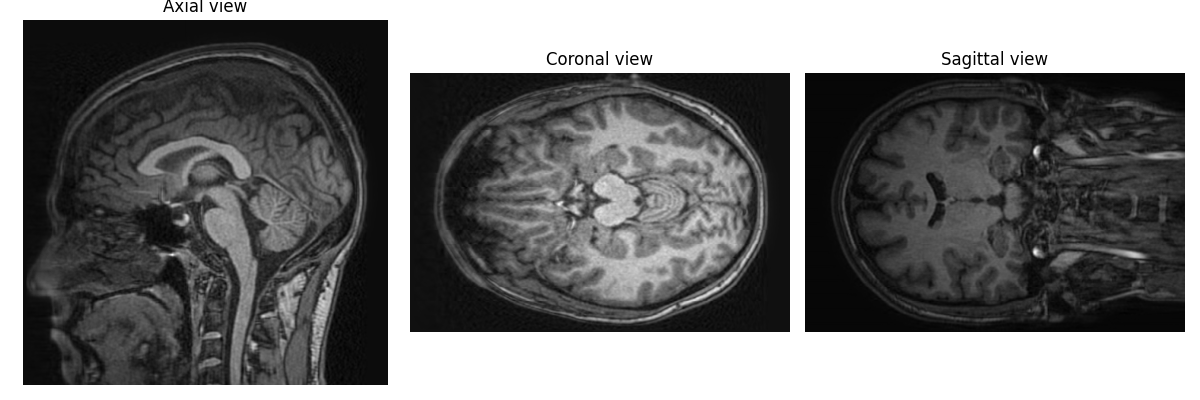

In [337]:
# No modifique, solo ejecute
AXIAL_VIEW, CORONAL_VIEW, SAGITTAL_VIEW = get_views(H, coor=(164, 240, 240))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(AXIAL_VIEW, cmap=plt.cm.gray)
axes[0].set_title("Axial view")

axes[1].imshow(CORONAL_VIEW, cmap=plt.cm.gray)
axes[1].set_title("Coronal view")

axes[2].imshow(SAGITTAL_VIEW, cmap=plt.cm.gray)
axes[2].set_title("Sagittal view")

for ax in axes:
  ax.axis('off')

plt.tight_layout()
plt.show()

2.3 **(5 puntos)** A continuación se muestran todos los ejes y sus imágenes correspondientes reconstruidas con $k=200$ componentes principales.

Valor de H: [[[ 9.21580527e-15  4.98678894e-12  1.93054693e-13 ...  7.84442350e-17
   -1.31651719e-04  3.64692538e-16]
  [ 9.21580527e-15  4.98678894e-12  1.93054693e-13 ...  7.84442350e-17
   -1.31651719e-04  3.64692538e-16]
  [ 9.21580527e-15  4.98678894e-12  1.93054693e-13 ...  7.84442350e-17
   -1.31651719e-04  3.64692538e-16]
  ...
  [ 9.21580527e-15  4.98678894e-12  1.93054693e-13 ...  7.84442350e-17
   -1.31651719e-04  3.64692538e-16]
  [ 9.21580527e-15  4.98678894e-12  1.93054693e-13 ...  7.84442350e-17
   -1.31651719e-04  3.64692538e-16]
  [ 9.21580527e-15  4.98678894e-12  1.93054693e-13 ...  7.84442350e-17
   -1.31651719e-04  3.64692538e-16]]

 [[ 1.30491754e-16  4.80808207e-05  4.66452970e-16 ... -3.72574121e-32
   -1.31651719e-04  7.96289898e-32]
  [ 1.30491754e-16  4.80808207e-05  4.66452970e-16 ... -3.72574121e-32
   -1.31651719e-04  7.96289898e-32]
  [ 1.30491754e-16  4.80808207e-05  4.66452970e-16 ... -3.72574121e-32
   -1.31651719e-04  7.96289898e-32]
  ...
  [ 1.30491

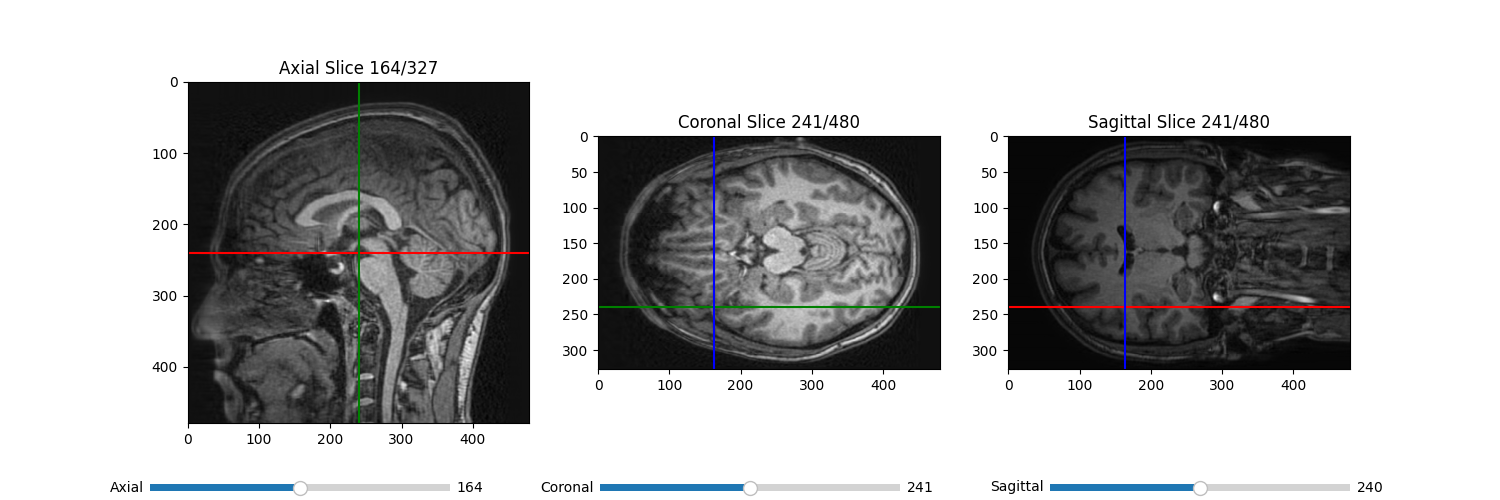

In [338]:
# No modifique, solo ejecute
viewer = SliceViewer3D(H, fun=get_views)
plt.show()

# Pregunta 3

Debido a una colisión con un asteroide, la nave de los extraterrestres tendrá que desechar al espacio algunas de las unidades de información en las que están guardadas los componentes de la matriz $Vh$ para eliminar la turbulencia. Para esto, saben que usted es experto en la compresión de imágenes y lo teletransportan a su nave en busca de su ayuda.

3.1 **(10 puntos)** Exprese la función $f$ que describa el valor de la varianza preservada en términos de algunas de las variables entregadas, i.e. `(Vh, Y, S, mu)` y utilizando $k$ vectores singulares con $k=1,...,400$ de manera que pueda determinar cuantas unidades de información se deberán expulsar de la nave espacial.

**Respuesta:**

---

*Reemplace este texto por su respuesta.*

---

3.2 **(10 puntos)** Implemente la función $f$ utilizando la expresión anterior. Es tarea de usted determinar qué variables le serán de utilidad para el cálculo.

In [339]:
def f(Vh, Y, S, mu, k):
  """
  input:
  Vh  :(ndarray) array of the principal components.
  Y   :(ndarray) array of projected coefficients.
  S   :(ndarray) array of singular values.
  mu  :(ndarray) 1D array of averages per column of original data.
  k   :(int)     number of principal components to use.

  output:
  r   :(float)   total variance preserved using k components.
  """
  # acá va su código
  #--------------------------

  #--------------------------
  return r

In [340]:
# No modifique, solo ejecute

# Creación del dominio
dom = np.int16(np.linspace(1, 400, 400))

# Vectorización de la función
f_vec = np.vectorize(lambda k: f(Vh, Y, S, mu, k))

3.3 **(15 puntos)** Ejecute la siguiente celda para graficar la función $f$ en todo el dominio y analice los resultados. ¿Qué información puede extraer del gráfico? Fundamente.

NameError: name 'r' is not defined

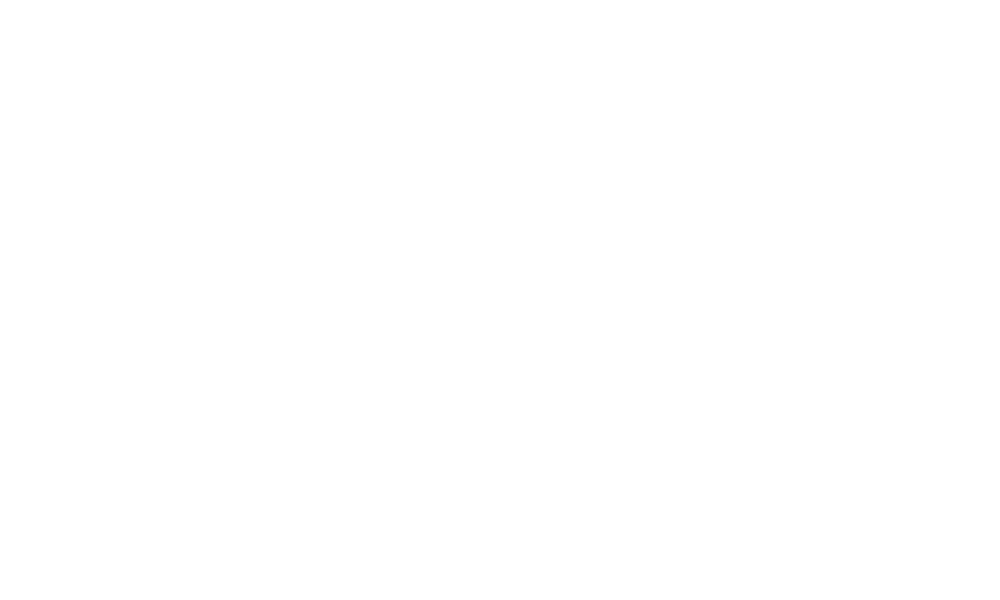

In [341]:
# No modifique, solo ejecute

# Gráfico de la función
plt.figure(figsize=(10, 6))

plt.plot(dom, f_vec(dom), label='Recorrido f(x)', marker='o', linestyle='-', markersize=3)
plt.ylabel('f(x)')
plt.xlabel('x')

plt.yticks(np.arange(0, 1.1, 0.05)) 
plt.ylim(0, 1) 
plt.grid(axis='both')

plt.legend(loc='best')
plt.title('Gráfico f(x)')
plt.show()

**Respuesta:**

---

*Reemplace este texto por su respuesta.*

---

3.4 **(10 puntos)** Implemente la función `find_k`, la cual a partir de una función $f$ y un porcentaje $delta \in [0,1]$ deseado de varianza a preservar, este calcule el valor $k$ de componentes necesarios.
Finalmente, utilice esta función para darle una respuesta a los marcianos sobre cuántas unidades de información deben sacar de la nave, considerando que ellos necesitan preservar el $94.397316\%$ de la información de los datos.

*Hint: consider using the previous function and avoid exhaustive search having in mind that there are better methods.*

In [46]:
def find_k(f, delta):
    """
    input:
    f       :(callable) vectorized function from 3.2.
    delta   :(float)    percentage of information to be preserved.
    
    output:
    k       :(int)      number of components to use to preserve delta of information.
    """
    # acá va su código
    #--------------------------

    #--------------------------
    return k

En la siguiente celda defina el valor de delta para luego evaluar la función anterior.

In [47]:
# Aquí definir el valor de delta. Solo cambie el 1 por el valor que usted está definiendo como delta.
delta = 1

In [ ]:
# No modifique, solo ejecute
best_k = find_k(f_vec, delta)
best_k

**Respuesta:**

---

*Reemplace este texto por su respuesta.*

---

3.5 **(15 puntos)** ¡Excelente!, ahora proponga un $k$ ocupando el método del *Ojímetro* respecto al gráfico en 3.3, reconstruya las imágenes y compare el $k$ que usted como profesional recomienda y el que quieren ocupar los marcianos para estabilizar la nave.

Describa las diferencias que puede percibir y cuál es la mejor función a utilizar. Fundamente su respuesta en base a los contenidos.

**A considerar**: el valor de $k$ elegido **debe** ser distinto del obtenido en la pregunta anterior y mostrar diferencia, pues el puntaje obtenido en esta pregunta será asignado en función de la calidad de su respuesta.

**Respuesta:**

---

*Reemplace este texto por su respuesta.*

---

In [ ]:
# acá va su código
#--------------------------

#--------------------------

**¡Ya ha llegado al final de la tarea 2! Ahora debe enviarla antes de las 23:55 hrs. del viernes 4 de octubre!**  

**Solo debe entregar este notebook. Recuerde que el archivo de entrega debe seguir el siguiente formato: “apellido1_apellido2_tarea_numero.ipynb” en minúsculas, y no olvide revisar el reglamento de tareas.**